In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset
data = pd.read_csv("../data/income.csv")

In [6]:
# Basic information
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())
print("\nColumn Names:", data.columns.tolist())
print("\nDataset Info:")
print(data.info())

Dataset Shape: (48842, 15)

First 5 rows:
    age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0

In [7]:
# Descriptive statistics
print("\nNumerical Summary:\n", data.describe())
print("\nCategorical Summary:\n", data.describe(include=['object']))


Numerical Summary:
                 age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  

Categorical Summary:
  

In [17]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [9]:
# CATEGORICAL FEATURES ANALYSIS
print("CATEGORICAL FEATURES - UNIQUE VALUES")
print("=" * 60)

categorical_columns = ['workclass', 'occupation', 'native-country']

for col in categorical_columns:
    print(f"\n{col.upper():<20} ({data[col].nunique()} unique values)")
    print("-" * 40)
    unique_vals = data[col].unique()
    
    # Display in organized blocks
    for i in range(0, len(unique_vals), 5):  # 5 values per line
        chunk = unique_vals[i:i+5]
        print("  " + " | ".join(f"{val:<15}" for val in chunk))
    
    print(f"Missing values: {data[col].isnull().sum()}")

CATEGORICAL FEATURES - UNIQUE VALUES

WORKCLASS            (9 unique values)
----------------------------------------
  Private         | Local-gov       | ?               | Self-emp-not-inc | Federal-gov    
  State-gov       | Self-emp-inc    | Without-pay     | Never-worked   
Missing values: 0

OCCUPATION           (15 unique values)
----------------------------------------
  Machine-op-inspct | Farming-fishing | Protective-serv | ?               | Other-service  
  Prof-specialty  | Craft-repair    | Adm-clerical    | Exec-managerial | Tech-support   
  Sales           | Priv-house-serv | Transport-moving | Handlers-cleaners | Armed-Forces   
Missing values: 0

NATIVE-COUNTRY       (42 unique values)
----------------------------------------
  United-States   | ?               | Peru            | Guatemala       | Mexico         
  Dominican-Republic | Ireland         | Germany         | Philippines     | Thailand       
  Haiti           | El-Salvador     | Puerto-Rico     | Vietn

In [10]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 52


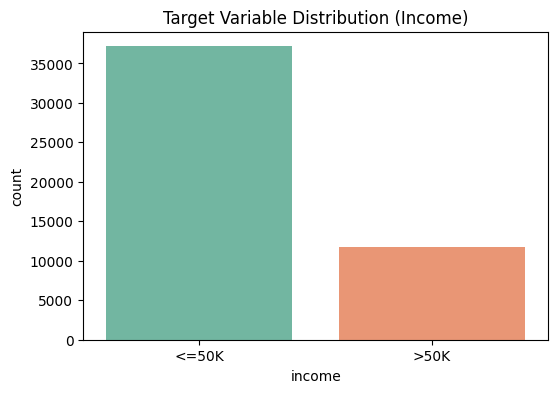

In [18]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=data, hue='income', palette='Set2', legend=False)
plt.title("Target Variable Distribution (Income)")
plt.show()


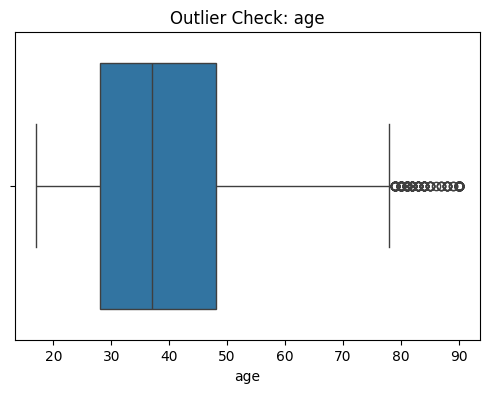

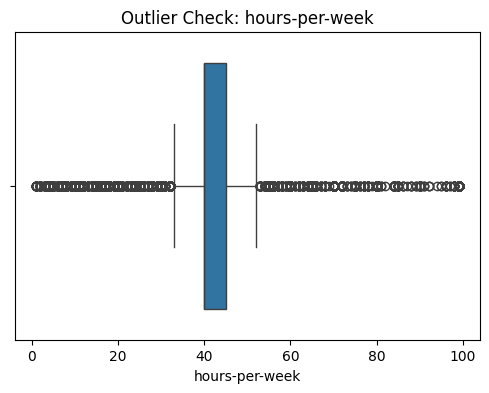

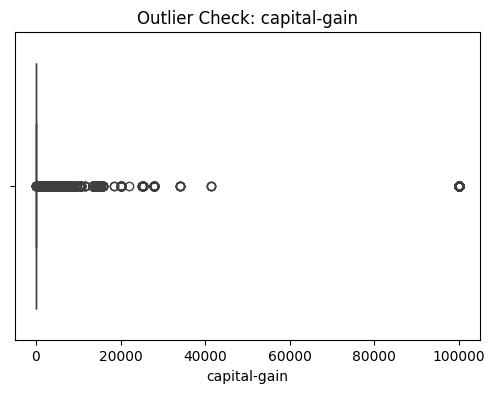

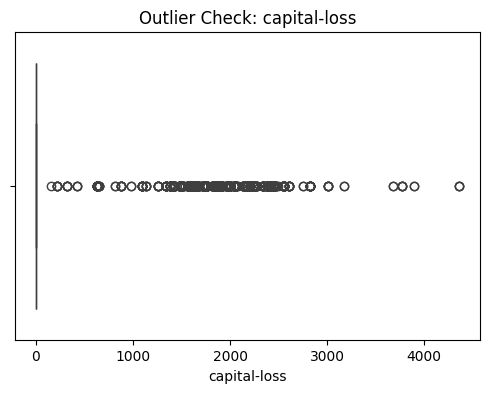

In [19]:
# Outlier check (boxplots for key numeric columns)
numeric_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

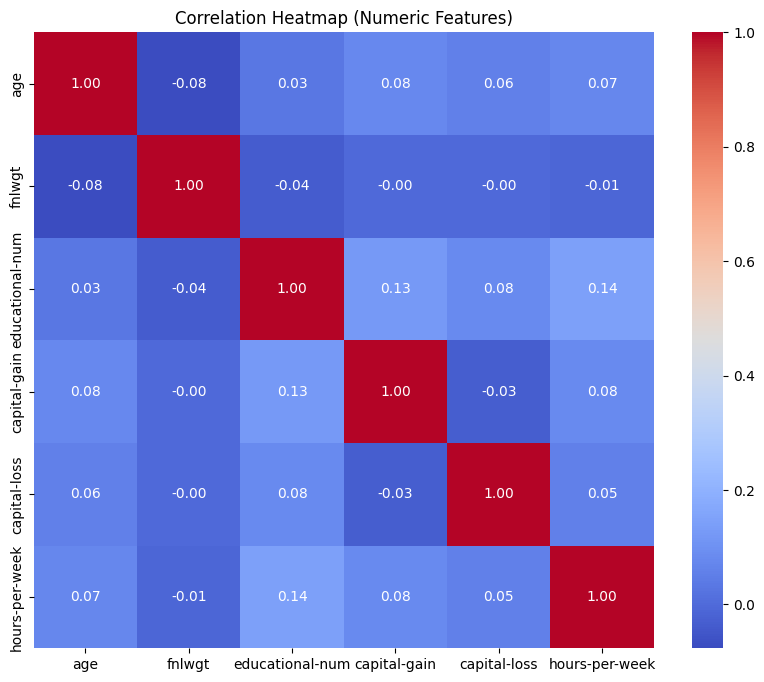

In [22]:
# Correlation matrix (numeric features only)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()